In [125]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [180]:
data = pd.read_csv('beer-servings.csv')

In [182]:
data = data.iloc[:,1:]

In [184]:
data.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe


## dropping duplicate rows if any

In [187]:
duply = data.duplicated()

In [189]:
duply.sum()

0

In [191]:
data = data[~duply]

In [193]:
data.shape

(193, 6)

In [195]:
data.drop_duplicates(inplace=True)

In [197]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

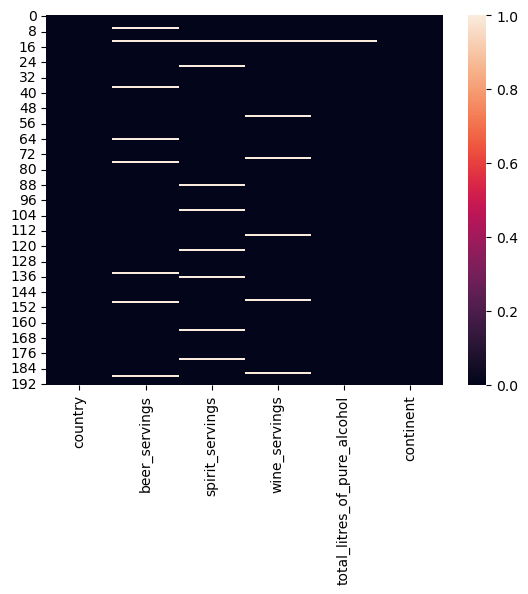

In [199]:
sns.heatmap(data.isna())
plt.show()

In [200]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [201]:
data.isna().sum()/data.shape[0]*100

country                         0.000000
beer_servings                   4.145078
spirit_servings                 4.145078
wine_servings                   3.108808
total_litres_of_pure_alcohol    0.518135
continent                       0.000000
dtype: float64

In [205]:
#data=data.dropna()
#data.dropna(inplace=True)

In [178]:
# Define in which columns to look for NA values
#data.dropna(subset=['beer-servings.csv','wine_servings'],inplace=True)

# Handling missing values

## Splitting numerical and categorical columns

In [215]:
num_df = data.select_dtypes(include='number')
cat_df = data.select_dtypes(include='object_')

In [244]:
print('numerical columns are')
num_cols = num_df.columns.tolist()
print(num_cols)

cat_cols = cat_df.columns.tolist()
print('categorical columns are')
print(cat_cols)

numerical columns are
['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
categorical columns are
['country', 'continent']


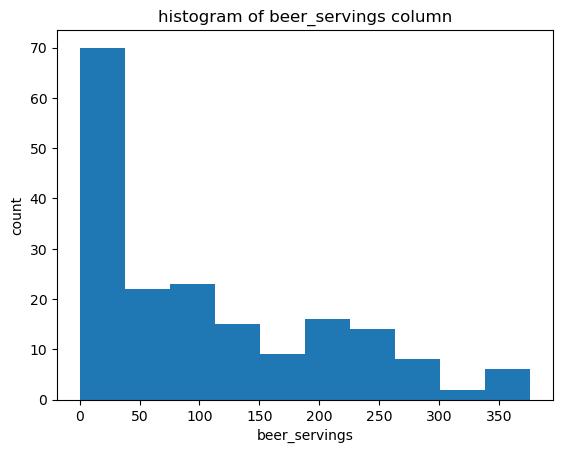

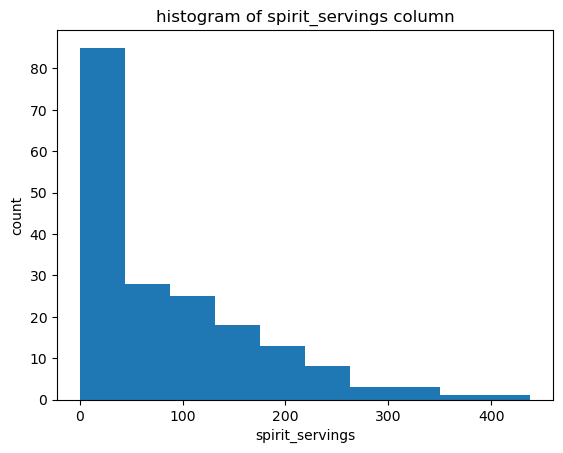

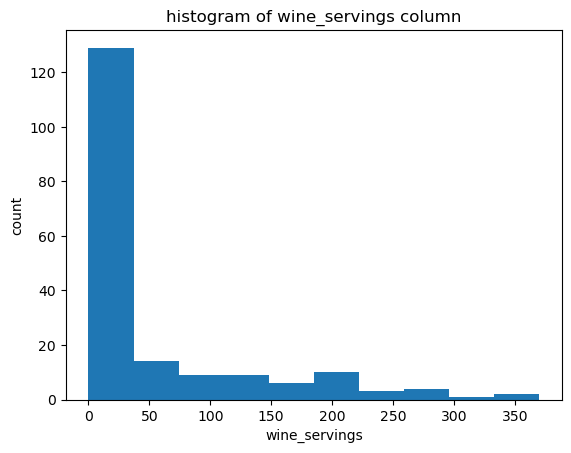

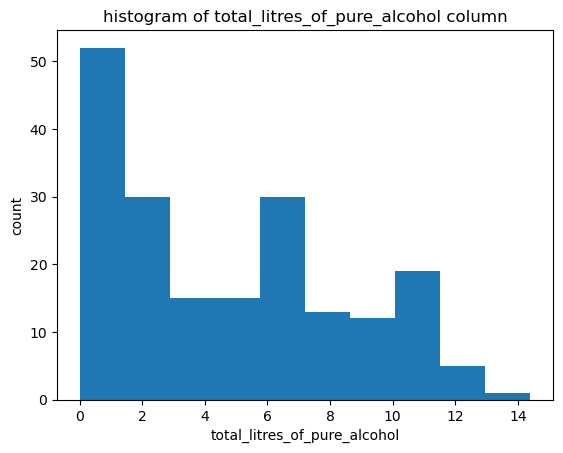

In [229]:
for col in num_cols:
    plt.hist(num_df[col])
    plt.title('histogram of {} column'.format(col))
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

In [235]:
for col in num_cols:
    num_df[col] = num_df[col].fillna(num_df[col].median())

In [237]:
num_df.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

# filling missing values for categorical columns

In [259]:
cat_df[col].mode()

0    Africa
Name: continent, dtype: object

In [271]:
for col in cat_cols:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

In [277]:
data = pd.concat([num_df,cat_df],axis=1)

In [281]:
data.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
country                         0
continent                       0
dtype: int64

# checking duplicated columns

In [285]:
dup_cols = data.columns.duplicated()
#to remove duplicated col 
#data = data.loc[:,~dup_cols]

# checking duplicate columns visually

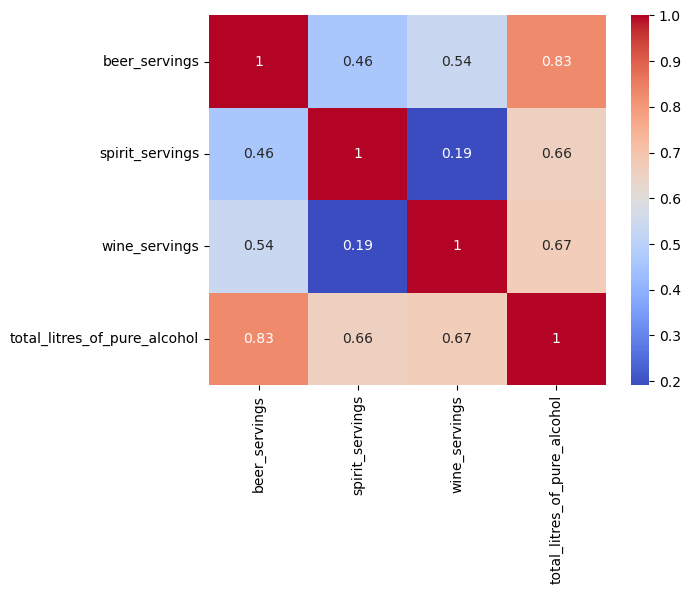

In [291]:
sns.heatmap(num_df.corr(),annot=True, cmap='coolwarm')
plt.show()

# Outlier Handling

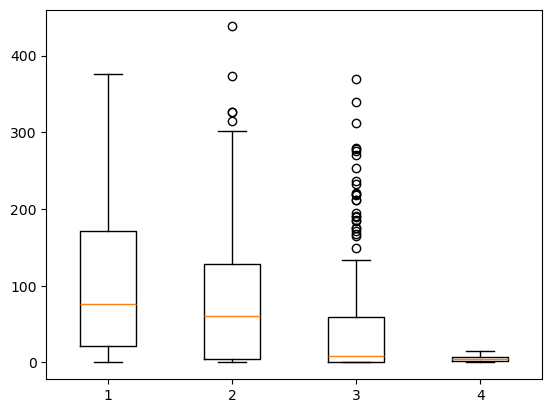

In [294]:
plt.boxplot(num_df)
plt.show()

In [300]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    df[column_name] = df[column_name].clip(upper=ub)
    df[column_name] = df[column_name].clip(lower=lb)
    return df[column_name]

In [302]:
for col in num_cols:
    num_df[col] = remove_outliers(num_df,col)

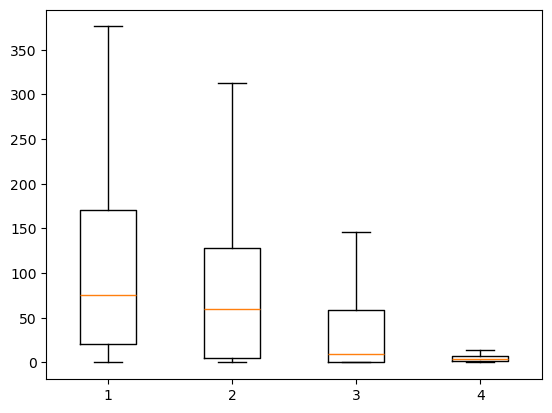

In [304]:
plt.boxplot(num_df)
plt.show()

In [308]:
data = pd.concat([num_df,cat_df],axis=1)

# Checking Data Imbalance


In [311]:
data['continent'].value_counts()

continent
Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: count, dtype: int64

# Plot Class Imbalance

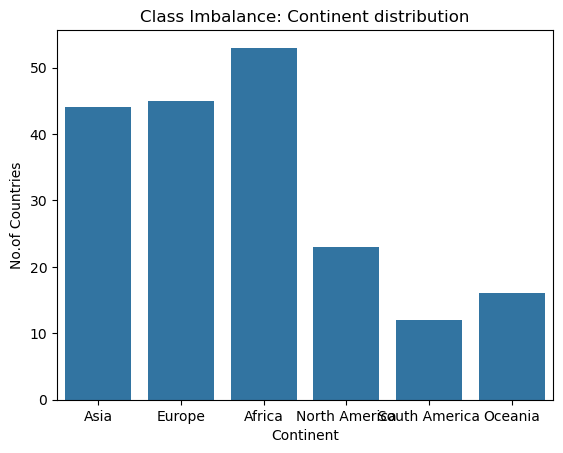

In [320]:
sns.countplot(x='continent',data=data)
plt.title('Class Imbalance: Continent distribution')
plt.xlabel('Continent')
plt.ylabel('No.of Countries')
plt.show()

In [354]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

x=data.drop('continent',axis=1)
y=data['continent']

oversampler = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(x,y)

continent
Asia             53
Europe           53
Africa           53
North America    53
South America    53
Oceania          53
Name: count, dtype: int64


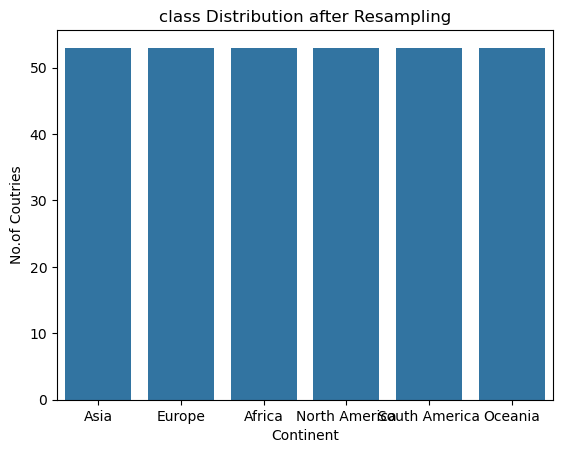

In [358]:
# create a new balanced ddataframe
balanced_data = pd.DataFrame(x_resampled,columns=x.columns)
balanced_data['continent'] = y_resampled

#check class distribution after resampling
print(balanced_data['continent'].value_counts())
sns.countplot(x='continent',data=balanced_data)
plt.title('class Distribution after Resampling')
plt.xlabel('Continent')
plt.ylabel('No.of Coutries')
plt.show()

# Seperate Features and Lbbels


In [365]:
y = data['wine_servings']
x = data.drop('wine_servings',axis=1)

# Train-Test Split

In [378]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [380]:
x_train

,beer_servings,spirit_servings,total_litres_of_pure_alcohol,country,continent
92,62.0,0.0,6.2,Laos,Asia
173,36.0,21.0,1.1,Tonga,Oceania
41,149.0,87.0,4.4,Costa Rica,North America
64,76.0,100.0,5.4,Georgia,Europe
109,238.0,68.0,5.5,Mexico,North America
...,...,...,...,...,...
43,93.0,137.0,4.2,Cuba,North America
22,173.0,35.0,5.4,Botswana,Africa
72,93.0,302.0,7.1,Guyana,South America
15,142.0,312.5,14.4,Belarus,Europe
